# Assignment 2: AutoML - Adult Income Prediction

## Abstract

## Information about the Dataset

##### What is our ultimate aim with this notebook?
- Our ultimate aim is to build a machine learning model that can predict if the income exceeds $50K/year based on certaing parameters available in the census data. As part of this notebook we will be using H2O AutoML library to predict adult income and also interpret the model. Before we create a model we need to do some data cleaning, feature selection and exploratory data analysis of the UCI adult income dataset.

<i><b>UCI Machine Learning Repository Dataset Link: </b>  https://archive.ics.uci.edu/ml/datasets/adult</i>

<h4><b>Exploratory Data Analysis and Feature Engineering</b></h4>

* After doing an initial data analysis we could find a couple of nan values present in our dataset in a few categorical columns. For simplifying this notebook I have imputed values in respective feature rows to have consistent dataset values in all the rows and columns.

* Our dataset also has a lot of outliers in few of the numerical columns which we have removed to avoid running into modelling errors while using the AutoML Library.

* Total Number of Rows in our raw dataset: 48,842
* Total Number of columns in our raw dataset: 14
* Data Set Characteristics: Multivariate Model

***
#### Column Description for our Dataset
***
<b><i><u>Target Variable/Dependent Variable</u><i></b>
    
1. <b>Income:</b> This is the response variable. It consists of two values people earning <=50K (represented by class 0) and people earning more than 50k(represented by class 1).

<b><i><u>Predictor Variables/Independent Variables </u><i></b>

--------------------------------------------------------
                 Categorical Variables                  
--------------------------------------------------------
Total number of categorical variables in our dataset: 7
    
1. <b>Workclass:</b> This attribute represents the working class of an individual. It consists of 8 different categories - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
2. <b>Education:</b> The level of schooling a person has completed. It is a categorical variable
3. <b>Education-num:</b> It is a categorical variable having values from 1-25 by giving a number to the category
4. <b>Marital status:</b> This feature describes the marital status of an individual. It is a categorical variable
5. <b>Occupation:</b> This feature describes the job of an individual. It is a categorical variable
6. <b>Race:</b> This feature describes the race of a person. It is a categorical variable
7. <b>Native Country:</b> This feature consists of name of the home country of an individual. It is a categorical variable

--------------------------------------------------------
                 Numerical/Continuous Variables                  
--------------------------------------------------------
Total number of numerical/continuous variables in our dataset: 5
1. <b>Age:</b> This attribute represents the age of a particular person in the given row. This is a continous variable
2. <b>Capital Gain:</b> The total gain of capital of an individual. It is a continuous variable
3.  <b>Capital Loss:</b> The total loss of capital of an individual. It is a continuous variable
4. <b>Hours per week:</b> The total work done by an individual per week. It is a continuous variable
5. <b>Fnlwgt:</b> It is weight given to a particular group of people.It is a continous variable
    
---


    


In [35]:
#loading the required libraries
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import logging
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import warnings
warnings.filterwarnings("ignore")

In [36]:
#defining the environment variables of H2O
min_mem_size=6 
run_time=60
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

0
Checking whether there is an H2O instance running at http://localhost:12075 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "18.0.2.1" 2022-08-18; Java(TM) SE Runtime Environment (build 18.0.2.1+1-1); Java HotSpot(TM) 64-Bit Server VM (build 18.0.2.1+1-1, mixed mode, sharing)
  Starting server from /Users/ankitgoyal/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/x6/p1fbh7qs4936fc_d9nprgjph0000gn/T/tmphcw_hp3x
  JVM stdout: /var/folders/x6/p1fbh7qs4936fc_d9nprgjph0000gn/T/tmphcw_hp3x/h2o_ankitgoyal_started_from_python.out
  JVM stderr: /var/folders/x6/p1fbh7qs4936fc_d9nprgjph0000gn/T/tmphcw_hp3x/h2o_ankitgoyal_started_from_python.err
  Server is running at http://127.0.0.1:12075
Connecting to H2O server at http://127.0.0.1:12075 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,H2O_from_python_ankitgoyal_sivozv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [37]:
#loading the dataset into dataframe
df_h = h2o.import_file('adult_income_new.csv')
df_p = pd.read_csv('adult_income_new.csv')
y_p=df_p['bin_income']
df_p.drop('bin_income',axis=1,inplace=True)
df_p.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States
4,5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [38]:
#splitting the dataset into train and test with 80-20 ratio
pct_rows=0.80
df_train, df_test = df_h.split_frame([pct_rows])
print('Train dataframe size')
print(df_train.shape)
print('Test dataframe size')
print(df_test.shape)

Train dataframe size
(34114, 16)
Test dataframe size
(8463, 16)


In [39]:
#defining the predictor and response variable for our model
X=df_h.columns
y ='bin_income'
X.remove(y)

Text(0.5, 1.0, 'Distribution of Response Variable')

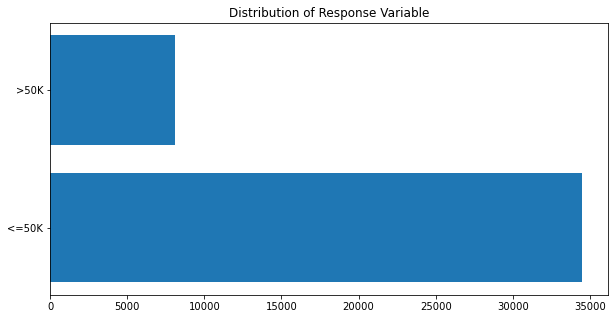

In [40]:
#checking the distribution of response variables in order to define the evaluation the evaluation metric
plt.figure(figsize=(10,5))
plt.barh(['<=50K','>50K'],y_p.value_counts())
plt.title('Distribution of Response Variable')

**<font color='blue'>Observation**</font>
<br>From the bar graph above, we can observe that ~81% of the datapoints belong to the class representing <=50K and the remaining ~19% belongs to the other class. This means that the dataset at hand is an imbalanced dataset.</br>

---

In [41]:
#defining the AutoML model
#we are using Generalized Linear estmator with family as binomial for our classification tasks
glm_model_main = H2OGeneralizedLinearEstimator(family= "binomial",seed=45,nfolds=5,remove_collinear_columns=True,compute_p_values=True,
                                          lambda_=0,balance_classes=True,score_each_iteration=True)
#training the model
print('<--------------------Model Training Started---------------------->')
glm_model_main.train(X, y, training_frame= df_train,validation_frame=df_test)
print('<-------------------Model Training Completed--------------------->')

<--------------------Model Training Started---------------------->
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
<-------------------Model Training Completed--------------------->


---
## **How do we evaluate our model**
Since we are dealing with an imbalanced binary classification task 
- Using accuracy as a performance metric won't make much sense as any dumb model will also give very high accuracy
- In this task we can use AUC score , log loss and Confusion matrix as our performance metrics for the given dataset
- **AUC Score** - <br> ROC analysis does not have any bias toward models that perform well on the minority class at the expense of the majority class which is very useful when dealing with imbalanced data.It a Area under curve between True positive rate and False positive rate.</br>
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/
- **Log Loss** - <br> This is another useful metric that we can use to evaluate the performance of the model. Logloss isindicative of how close is the prediction probability is to actual class. </br>
- **Confusion Matrix**  <br> The confusion matrix provides the information about the correct classifications and  misclassifications. We can calcualte various other parameters such as precision,recall and F1 score using Confusion matrix.

---

In [42]:
#printing the train and test AUC score
print(glm_model_main.model_performance(df_train)['AUC'])
print(glm_model_main.model_performance(df_test)['AUC'])

0.8876568751540045
0.8896394915625685


In [45]:
#printing train and test log loss
print(glm_model_main.model_performance(df_train)['logloss'])
print(glm_model_main.model_performance(df_test)['logloss'])

0.3164272973501853
0.30886189400999325


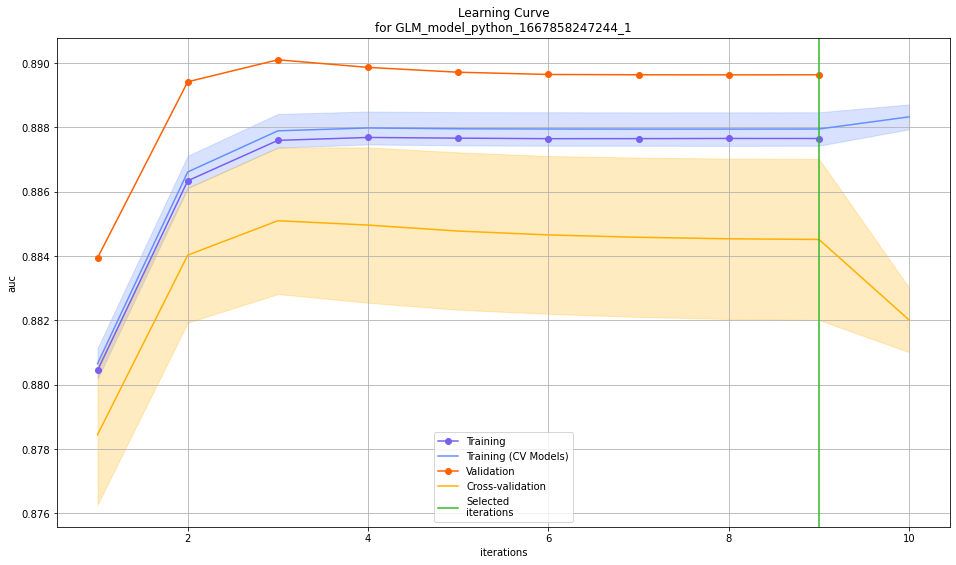

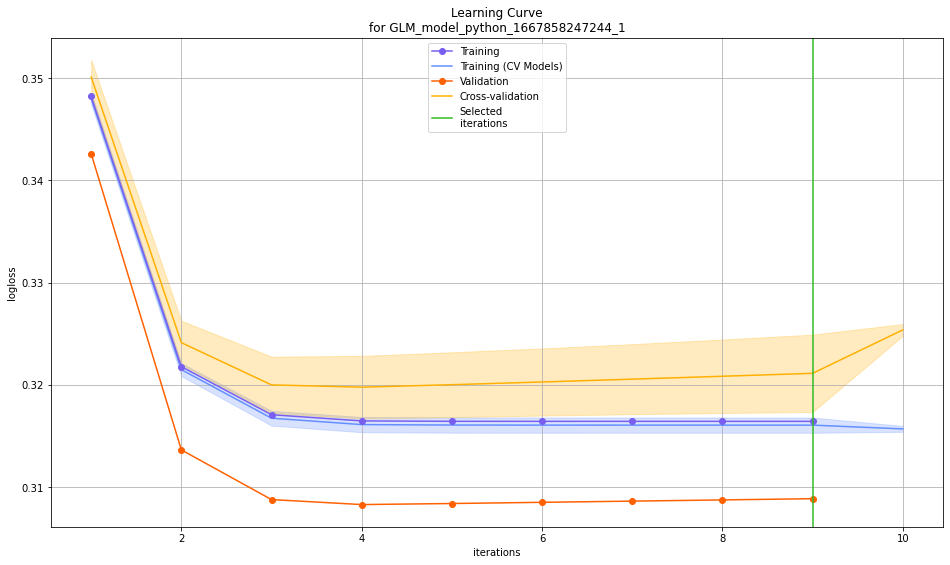

In [49]:
#plotting the learning curves
glm_model_main.learning_curve_plot('AUC')
glm_model_main.learning_curve_plot('logloss')

---
<font color='blue'> **Observation** </font>
<br> From the graph we can see that the log loss is decreasing and AUC is increasing with increase in the number of iterations, hence our model is fitting well</br>

---


In [50]:
#plotting the confusion matrix
glm_model_main.confusion_matrix(train=True,valid=True)

{'train': Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2973461300855833
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      23393  4156  0.1509   (4156.0/27549.0)
1      1760   4805  0.2681   (1760.0/6565.0)
Total  25153  8961  0.1734   (5916.0/34114.0),
 'valid': Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2807517757572407
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      5765  1138  0.1649   (1138.0/6903.0)
1      362   1198  0.2321   (362.0/1560.0)
Total  6127  2336  0.1772   (1500.0/8463.0)}

---
<font color='blue'> **Observation** </font>
<br> **Train data** It is quite evident from the confusion matrix that 87% of the total points are along the diagonal (true positives and true negatives) and only 13% of the total points are misclassified in the train data and hence our model is making good predictions on the data.</br>
<br> **Test data** Also 83% of the total points are along the diagonal (true positives and true negatives) and only 17% of the total points are misclassified in the test data and hence our model is making good predictions on the test data as well.</br>
<br>Some Overfitting related observations</br>
- As we can see our model is performing similarly on the train and test dataset and hence we are not facing problem of overfitting here. 
- We have already defined the parameters such as balance_classes=True so that equal proportion is given to both the classes and hence to avoid any undue advantage to majority class
- We have also removed the collinear features from the dataset
- We have performed hyperparameter tuning to find the best fit for our model</br>

---

<h1><i>Answering the Questions</i><h1>

## **Is the relationship significant?**

To answer this question we will find the z-score and corresponding p-value for each feature and check whether each coefficient is statistically significant or not

In [51]:
df_coef=(glm_model_main._model_json['output']['coefficients_table']).as_data_frame()
imp_features=(df_coef[df_coef['p_value']<=0.05])
print('There are total '+ str(imp_features.shape[0])+' features that are statistically significant. \n')
print('The following features are statistically significant \n')

for index,row in imp_features.iterrows():
  print('The feature '+ row['names'] +' is statistically significant.')
  print('z_value = '+str(row['z_value'])+ '     p_value =' + str(row['p_value']))
  print('-'*50)

There are total 42 features that are statistically significant. 

The following features are statistically significant 

The feature Intercept is statistically significant.
z_value = -10.382919683092052     p_value =2.9656408436038687e-25
--------------------------------------------------
The feature native-country.Columbia is statistically significant.
z_value = -2.4898192507975163     p_value =0.01278080752790205
--------------------------------------------------
The feature native-country.South is statistically significant.
z_value = -2.433587889656933     p_value =0.01495000546146963
--------------------------------------------------
The feature education.12th is statistically significant.
z_value = 2.5920876316809003     p_value =0.009539546881219232
--------------------------------------------------
The feature education.Assoc-acdm is statistically significant.
z_value = 9.161655187634782     p_value =5.1107313096874685e-20
--------------------------------------------------
The f

<font color='blue'> **Observation**</font>

We can see that majority of the coefficients are statistically significant and hence we can conclude that the realtionship between predictors and response variable is statistically significant.</br>

---

## **Are any model assumptions violated?**

##Logistic regression has the following assumptions
### **Assumption 1 - The realtion between continuos predictor variable and log odds of outcome is linear**

We can check that by using a few continous variables and plotting it against the log odds and check whether it follows the assumptions or not

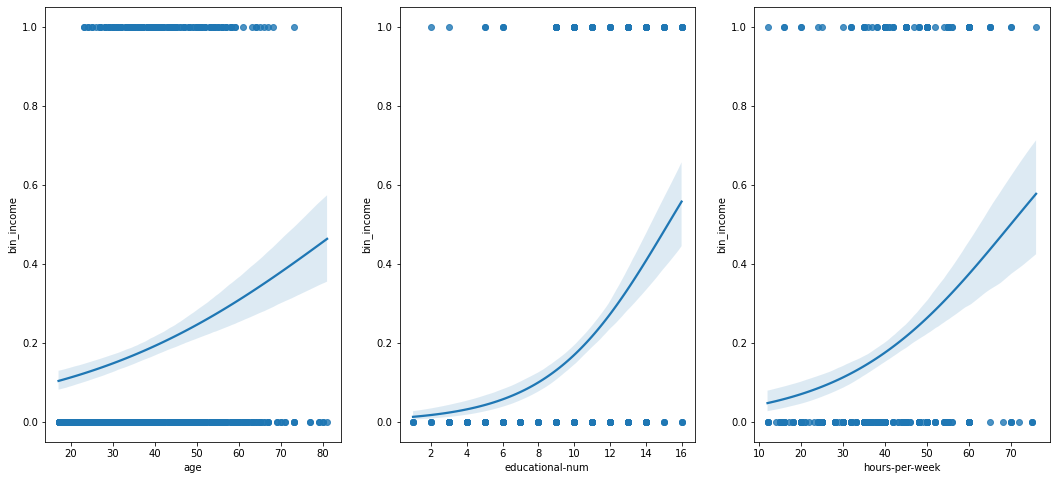

In [52]:
%matplotlib inline
numeric_cols=['age','educational-num','hours-per-week']
response=h2o.as_list(df_h['bin_income'])[:1000]
f, axs = plt.subplots(1,3,figsize=(18,8))
for i in range(len(numeric_cols)):
  plt.subplot(1,3,i+1)
  numeric_values=val=(df_h[numeric_cols[i]].as_data_frame()).loc[:999]
  sns.regplot(numeric_values,response,logistic=True)
plt.show()

<font color='blue'> **Observation** </font>

 Here we can see that the numerical variables are taking a S shaped curve when we have defined the logistic=True. This shows that the log odds of the response variable is linear with respect to the response. Since the curve is not perfectly s-shaped and hence the assumption is partially followed.
 
---

### **Assumption 2 - There are no outliers present in the dataset**

We can check for outliers using the boxplots for the numerical columns

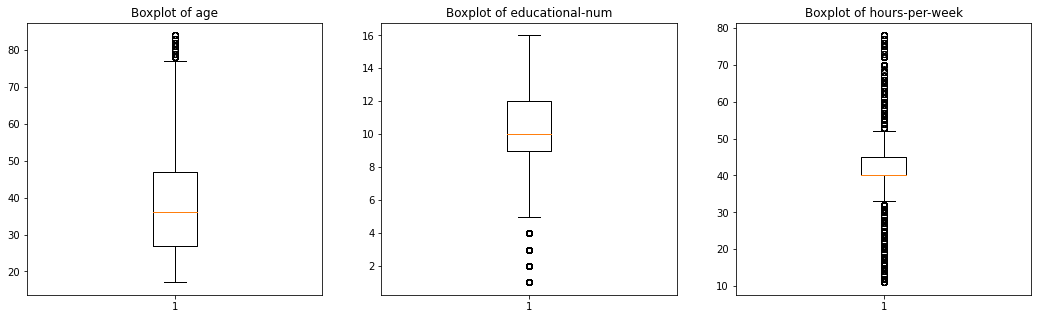

In [53]:
f, axs = plt.subplots(1,3,figsize=(18,5))
for i in range(len(numeric_cols)):
  plt.subplot(1,3,i+1)
  plt.title('Boxplot of '+ numeric_cols[i])
  plt.boxplot(df_p[numeric_cols[i]])
plt.show()

---
<font color='blue'>**Observation**</font>

- As it is clear from the boxplots that there are not much outliers present in the numerical columns age and educational-num. But there are still a few outliers in hours-per-week. So our assumption in partially followed.

## **Is there any multicollinearity in the model?**

### **Assumption 3 - There can be a little or no collinearity among the features**

For checking collinearity we can use the corr method and get the values in a heatmap

Text(0.5, 1.0, 'Collinearity between different features')

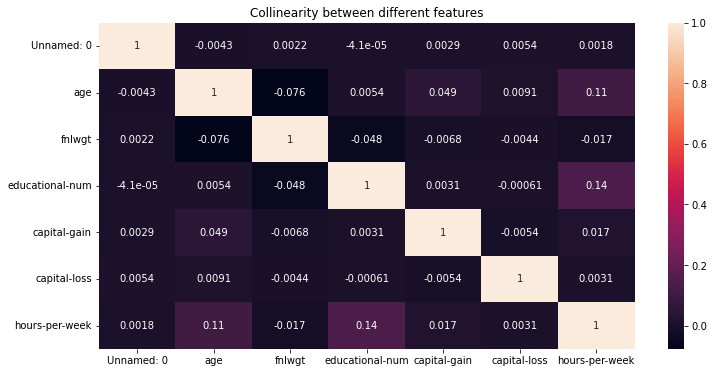

In [55]:
fig= plt.figure(figsize=(12,6))
sns.heatmap(df_p.corr(),annot=True)
plt.title('Collinearity between different features')

---

<font color='blue'> **Observation** </font>

- It is evident from the heatmap that most of the features are non-collinear as most of the values are close to 0
- The feature hours-per-week shows slight collinarity with age and educational_num
- While training the model we have used the parameter remove_collinear_coumns and hence the model is trained without any collinear features
- The assumption is followed while training the model

---

## **Does the model make sense?** ##

### ***Inference of the model*** ###

In the Evaluation metrics section we have seen that the model is fitting the data in a very optimised way and all the required scores that we were getting implied that the model is not overfitting. We will plot the AUC and logloss curve again to analyse the performance of the model again.

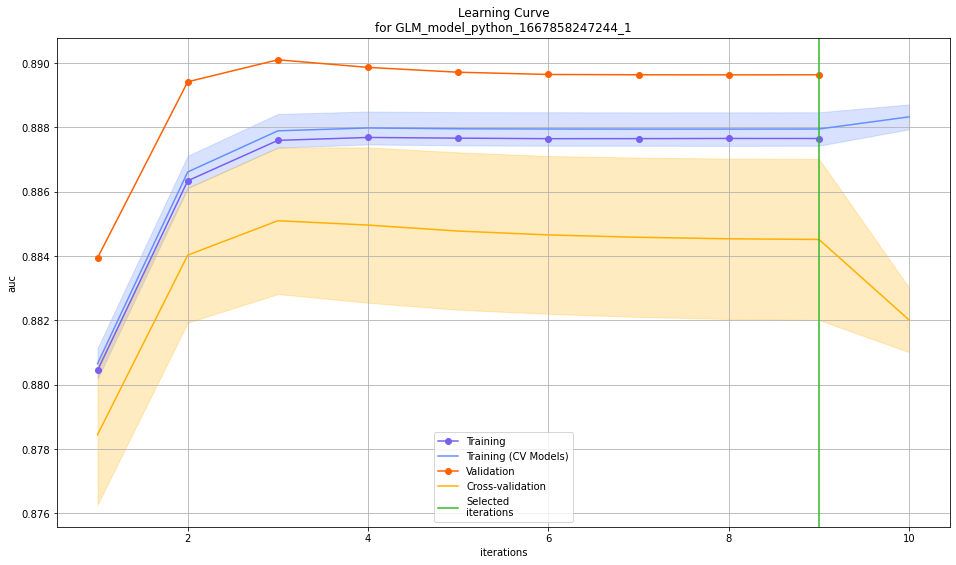

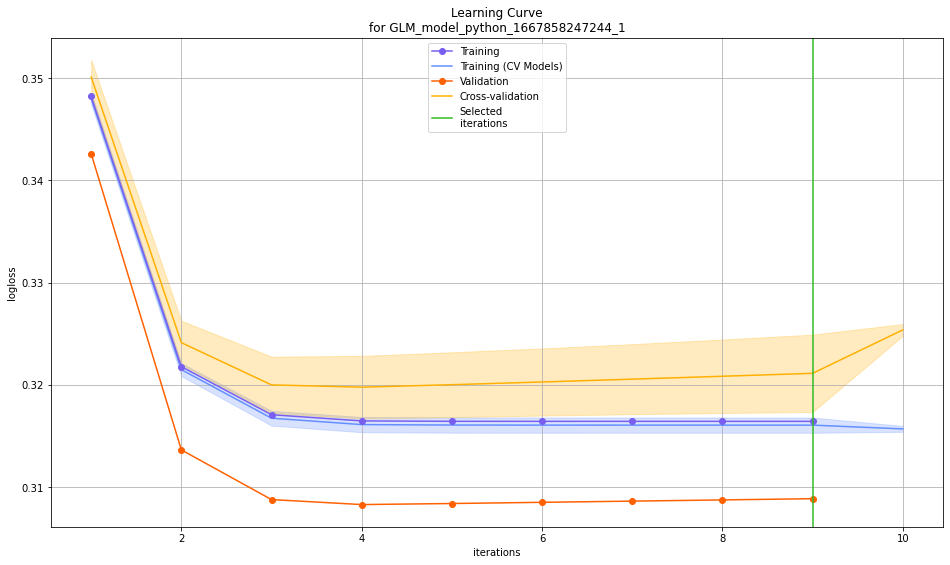

In [56]:
#checking the performance of the model
glm_model_main.learning_curve_plot('AUC')
glm_model_main.learning_curve_plot('logloss')

---
<font color='blue'> Observations </font>

- **AUC Curve** - It is quite evident that our model's train AUC score is increasing with iterations. The test AUC is also following up and it shows that our model is learning the coefficients effectively.

- **Log Loss Curve** - The log loss curve for both train and test data is decreasing with iterations. The probability values are in sync with the actual prediction values

### **Model Selection and Interpretability**
Here we have trained simple Generalized Linear model to fit in the given data for simplicity and better interpretability. We have defined the family as binomial and hence the model works as binary Logistic regression model which is very apt for classification tasks.

---
<br>**Steps done to to increase the performance of the model-**</br>
- We have removed the outliers and replaced the NaN values by mode of the respective columns.
- We have removed collinear columns while training our model.
- We have done hyperparameter tuning for alpha and lambda values and then compared the performance for different values.


**Things that can be done to further improve the model's performance**
- We could have tried ensemble based methods and then checked the performance of the model. 
- We could have performed more parameters tuning on our model.
- We could have tried stacking of models.
- We could have added more features into the data using the existing data.
- We could have performed data cleaning after taking consultation from any domain expert.

---

## **Regularization**

In GLM model the alpha hyperparameter defines the regularization technique. If alpha=0 then it is Ridge (L1) regularization, If alpha=1 then it is Lasso (L2) regularization.  If the value of alpha lies between 0-1 then Elastic net Regularization is applied i.e. combination of Lasso and Ridgeregularization.

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


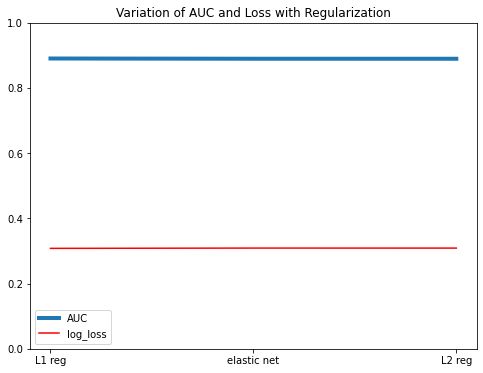

In [57]:
#we will train three models based on different values of alpha and then check the performance of the model
test_auc=[]
test_loss=[]
for alpha in [0,0.5,1]:
  glm_model = H2OGeneralizedLinearEstimator(family= "binomial",seed=2022,alpha=alpha)
  glm_model.train(X, y, training_frame= df_train)
  test_auc.append(glm_model.model_performance(df_test)['AUC'])
  test_loss.append(glm_model.model_performance(df_test)['logloss'])
plt.figure(figsize=(8, 6))
reg_list=['L1 reg','elastic net','L2 reg']
plt.plot(reg_list,test_auc,linewidth=4,label="AUC")
plt.plot(reg_list,test_loss,color='red',label='log_loss')
plt.ylim([0, 1])
plt.legend()
plt.title('Variation of AUC and Loss with Regularization')
plt.show()

---
<font color='blue'> **Observation**</font>

In this dataset regularization is not very helpful. The logloss and AUC score are relatively same for model with elastic net regularization, model with L1 regularization and model with L2 regularization

---

## **Which independent variables are significant?**

We can plot the top variables and their relative importance using the varimp method

In [58]:
#printing the top 10 important features
(glm_model_main.varimp(use_pandas=True)).head(10)

,variable,relative_importance,scaled_importance,percentage
0,workclass.Without-pay,10.258686,1.000000,0.098592
1,workclass.Never-worked,7.938061,0.773789,0.076290
2,education.Preschool,6.706340,0.653723,0.064452
3,education.Prof-school,3.277529,0.319488,0.031499
4,education.Doctorate,3.269315,0.318687,0.031420
5,marital-status.Married-AF-spouse,2.747986,0.267869,0.026410
6,education.Masters,2.618491,0.255246,0.025165
7,native-country.Columbia,2.563591,0.249895,0.024638
8,marital-status.Married-civ-spouse,2.368021,0.230831,0.022758
9,education.Bachelors,2.233336,0.217702,0.021464


- We can get the relative_importance of corresponding features and then plot them.

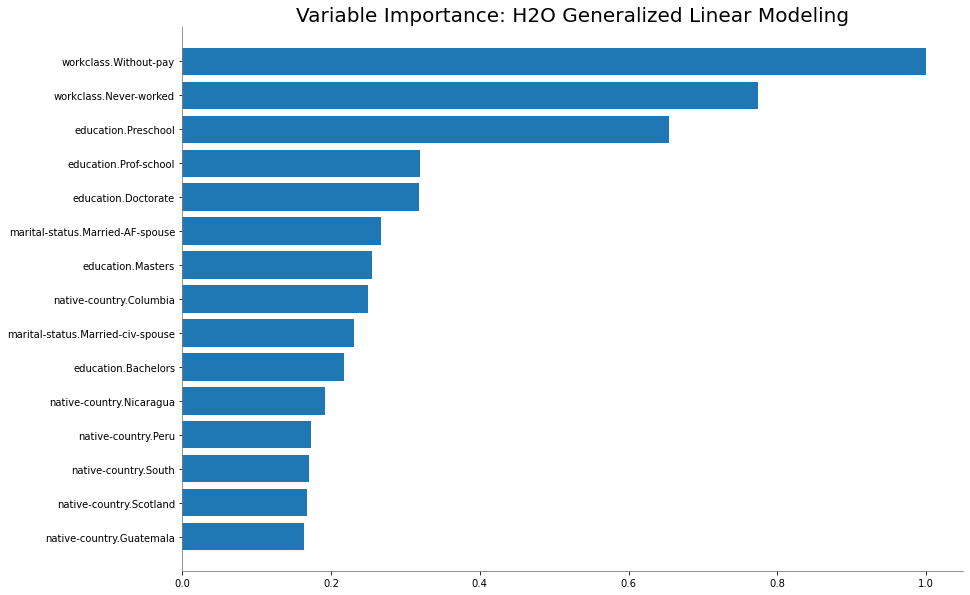

<Figure size 432x288 with 0 Axes>

In [59]:
#plotting the importance
glm_model_main.varimp_plot(15)

 ---

 **Observations**
- We can clearly see that the Never_worked and without pay category of feature workclass is the most important feature, and it is quite evident that a person who has never worked must be earning less than 50k
- Another important variables include Education level preschool and Country Peru and Columbia. These are also useful in predicting the class  as if an individual belongs to a poor country or he is less educated there are higher chances that he must be earlning less than 50k
- The features Eduction level Prof school and Doctorate will be useful in prediction the person earning more than 50k

---

## **Which hyperparameters are important?**

We can get all the parameters of the model using model_name.params.keys(). The parameters of our GLM model are as follows

Out of all the parameters the two most important parametrs in GLM models are lambda and alpha
1. Lambda - It defines the regularization strength 
When performing regularization, penalties are introduced to the model buidling process to avoid overfitting, to reduce variance of the prediction error, and to handle correlated predictors
2. Alpha - Specify the regularization distribution between L1 and L2

**Tuning the parameters and checking whether it impacts performance of our models**

In [61]:
import seaborn as sns
train_auc=[]
test_auc=[]
train_loss=[]
test_loss=[]
reg_list=[0.01,0.1,0,10]
alpha_list=[0,0.5,0.75,1]
for reg in reg_list:
  for alpha in alpha_list:
     glm_model = H2OGeneralizedLinearEstimator(family= "binomial",lambda_ = reg,seed=2022,alpha=alpha)
     glm_model.train(X, y, training_frame= df_train)
     train_auc.append(glm_model.model_performance(df_train)['AUC'])
     test_auc.append(glm_model.model_performance(df_test)['AUC'])  

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |███████████████████████

Text(0.5, 1.0, 'Test AUC')

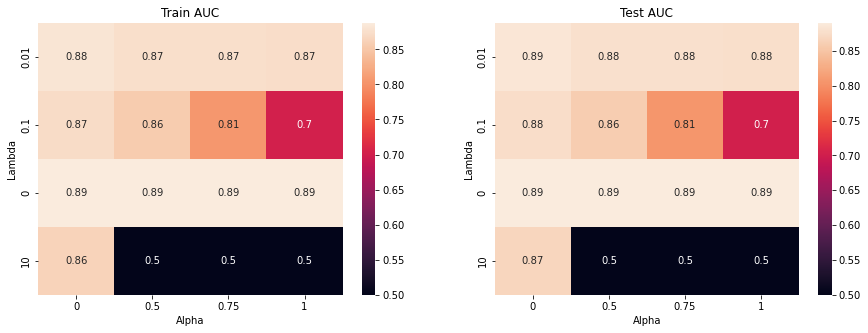

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(121)
(sns.heatmap(data=np.array(train_auc).reshape(4,4),xticklabels=alpha_list,yticklabels=reg_list,annot=True))
plt.xlabel('Alpha')
plt.ylabel('Lambda')
plt.title('Train AUC')
plt.subplot(122)
(sns.heatmap(data=np.array(test_auc).reshape(4,4),xticklabels=alpha_list,yticklabels=reg_list,annot=True))
plt.xlabel('Alpha')
plt.ylabel('Lambda')
plt.title('Test AUC')

---

<font color='blue'> **Observations** </font>
- As we can clearly see that the AUC score varies a lot when we change the values of Regularization strength lambda and alpha the regularization distribution
- As we increase the Regularization strength to some higher positive value(i.e 10) the AUC drops significantly
- It is nice to observe that the best performance of model is obtained when the value of lambda is 0.01 or when it is 0 i.e. no regularization
***

# **Conclusion**

- As per our analysis we can say that Logistic regression model is performing well on the given data
- "Never worked" and "without pay in Workclass" are the most important features for predicting the output
- Our model is not overfitting as we are getting similar performance in train and test data
- The AUC we get is ranging between 87-88% for both train and test data
- The missclassification rate as evident from the Confusion matrix is 13%
***

## Citations

1.Many techniques used in this notebook have been adopted from the following github repositories

* Owner - AI Skunkworks
* Link - https://github.com/aiskunks/Skunks_Skool
<br></br>
* Author name - Prof Nik Bear Brown
* Link - https://github.com/nikbearbrown/

2.The methods and parameters of the models amd code corrections have been adapted from stackoverflow

* Link - https://stackoverflow.com

3.Reference has been taken from the seaborn webpage for charts and visualization
* Link - https://seaborn.pydata.org

4.The methods and parameters of the GLM model have been adapted from the h2o documentation</br>
* Author - **H2O.ai**
* Link - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html</br>

***
## Licensing

Copyright 2022 Ankit Goyal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.